In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r"C:\Users\DGaard\Desktop\Gits\MoleculeSim\ownSim")

import forces as fc
import molecules as mc
import random

%matplotlib widget

In [2]:
# Parameters for universe initialization
box_const_size = 500
box_size = np.array([box_const_size,box_const_size,box_const_size]) #max coordinate values for universe
num_molecules = 20
num_steps = 20
radius  = 100

#other setup
seed = 1313

# Create Universe
molecules = [mc.Molecule(np.array([random.uniform(0,box_size[0]), 
                    random.uniform(0,box_size[1]), 
                    random.uniform(0,box_size[2]) ]),radius) for _ in range(num_molecules)]

print(len(molecules),molecules[0].pos)

uni = mc.SimpleUniverse(molecules,seed)


20 [405.66055894 468.89966853 171.11995385]


In [3]:
points = []

# Perform Simulation
for i in range(num_steps):
  #randomly select a molecule
  mol = uni.select_molecule()
  #keep proposing new steps until one is accepted
  mc.step(uni,mol)
  #store intermediate results?
  points.append(uni.get_state())



In [7]:
[np.array([[100,100,100]])]

[array([[100, 100, 100]])]

In [6]:
print(points)

[array([[405.66055894, 468.89966853, 171.11995385],
       [426.73516134, 270.50393113,  76.70041951],
       [ 79.85210233, 175.21017651, 345.21191358],
       [478.38741877, 466.45328883, 151.16913555],
       [100.57455731, 430.45496405, 404.03732734],
       [ 42.13777602, 195.18386267, 214.56528573],
       [187.73973665,  96.78760968,  88.57595515],
       [424.50760397, 292.05000202,  26.38962651],
       [264.04284015, 241.75741496,  36.40094459],
       [ 42.71243878, 359.81584882, 255.90424867],
       [413.79253157,  61.28168699, 312.97212574],
       [125.57661031, 271.99189812,  70.34178947],
       [429.7835503 , 464.01653963, 243.03507604],
       [ 93.13160511, 174.63297139, 126.76924168],
       [223.41537958, 380.33050837, 144.43180426],
       [489.42154413,  32.15239406, 112.45064701],
       [486.50715177, 144.4585764 , 436.04697904],
       [ 32.85723938, 376.49951985, 358.57526412],
       [ 59.08785922, 188.07465042, 466.4459391 ],
       [482.69429164, 371.4255

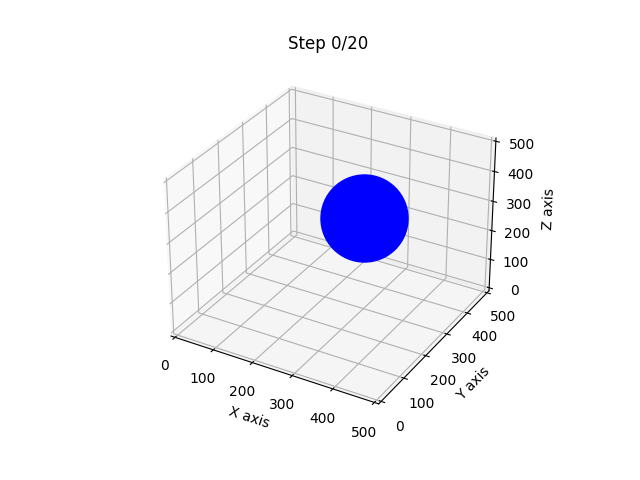

In [21]:
#Plot each iteration of the simulation

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# Generate sample data (list of 3D coordinates at different steps)
data = [np.array([[300,300,300]])]#points  # Random 3D coordinates

# Set up the figure and 3D axis
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

# Function to update the plot based on the selected step
def update_plot(frame):
    ax.clear()
    ax.set_title(f"Step {frame}/{num_steps}")
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_zlim3d(zmin=0,zmax=500)
    ax.set_xlim(0, box_size[0])  # Adjust as per your data range
    ax.set_ylim(0, box_size[0])  # Adjust as per your data range
    ax.set_zlim(0, box_size[0])  # Adjust as per your data range

    # Plot the 3D coordinates for the selected step
    
    x = data[frame][:, 0]
    y = data[frame][:, 1]
    z = data[frame][:, 2]



    ax.scatter(x, y, z, c='blue', marker='o',s=np.pi/8*radius**2)
    #plt.show()

update_plot(0)
# Create the animation
#ani = FuncAnimation(fig, update_plot, frames=num_steps, interval=20)
# Display the animation in the notebook
#HTML(ani.to_jshtml())
#ani.save('the_movie.mp4', writer = 'mencoder', fps=15)

#HTML(ani.to_html5_video())

#for i in range(num_steps):
#  update_plot(i)
    

In [5]:
0/0

ZeroDivisionError: division by zero

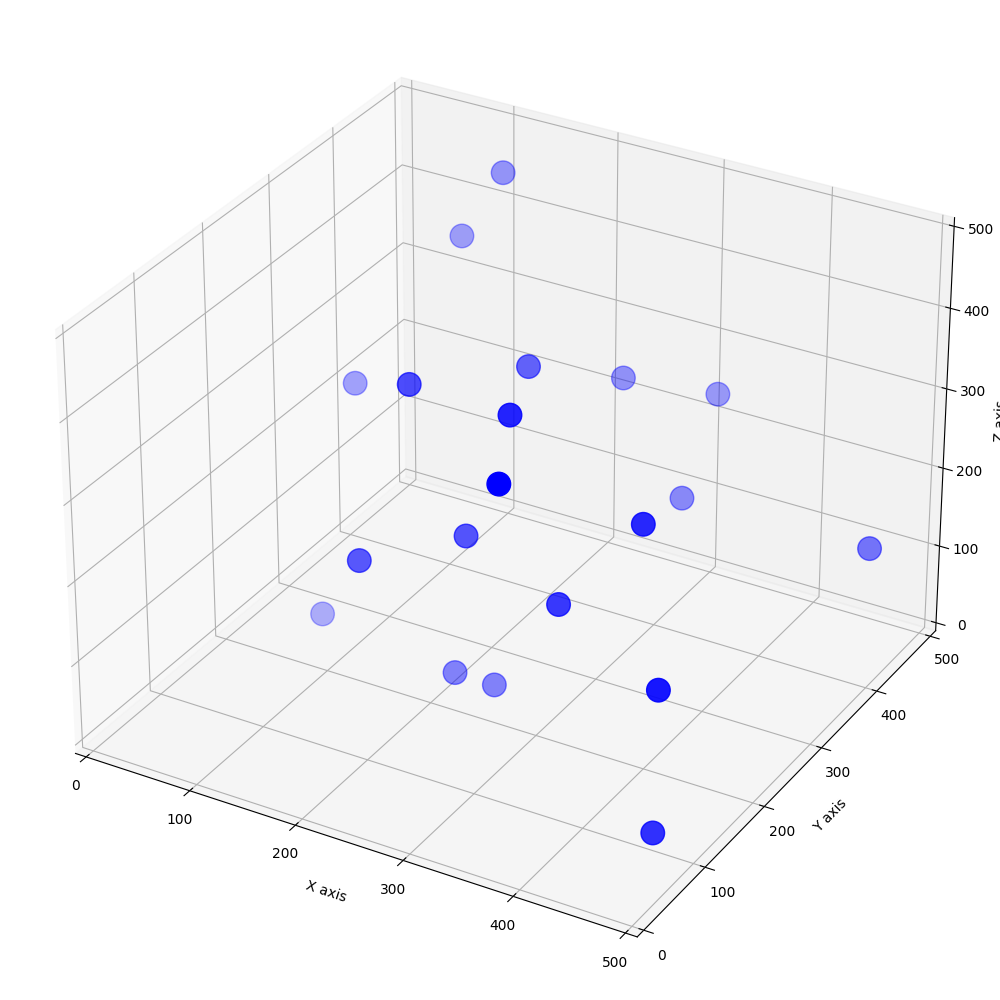

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# Generate sample data (list of 3D coordinates at different steps)
data = points  # Random 3D coordinates

fig_size = 10
points_whole_ax = fig_size * 1 * 72    # 1 point = dpi / 72 pixels
points_radius = 2 * radius / box_size[0] * points_whole_ax

# Set up the figure and 3D axis
fig = plt.figure(figsize=(fig_size,fig_size))


ax = fig.add_subplot(111, projection='3d')#,position=[0.0, 0.0, 1, 1])

# Function to update the plot based on the selected step
def update_plot(frame):
    ax.clear()
    ax.set_title(f"Step {frame}/{num_steps}")
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_position([0.0, 0.0, 1, 1])
    ax.set_xlim(0, box_size[0])  # Adjust as per your data range
    ax.set_ylim(0, box_size[1])  # Adjust as per your data range
    ax.set_zlim(0, box_size[2])  # Adjust as per your data range

    #ax.set_box_aspect(1)


    # Plot the 3D coordinates for the selected step
    
    x = data[frame][:, 0]
    y = data[frame][:, 1]
    z = data[frame][:, 2]



    ax.scatter(x, y, z, c='blue', marker='o',s=points_radius)
    plt.show()

# Create the animation
#ani = FuncAnimation(fig, update_plot, frames=num_steps, interval=20)
# Display the animation in the notebook
#HTML(ani.to_jshtml())
#ani.save('the_movie.mp4', writer = 'mencoder', fps=15)

#HTML(ani.to_html5_video())
update_plot(1)